In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()
# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Use the session to query Station table and display the first 5 name.
for row in session.query(Station, Station.name).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x000001E752506790>, 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001E7525068E0>, 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001E752506970>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001E7525069D0>, 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001E752506A30>, 'UPPER WAHIAWA 874.3, HI US')


In [10]:
# Close the session
session.close()

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
# Latest Date
rec_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
rec_date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.datetime.strptime(rec_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year

# Perform a query to retrieve the data and precipitation scores
p_score = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            filter(Measurement.date >= one_year).\
            group_by(Measurement.date).all()
p_score

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

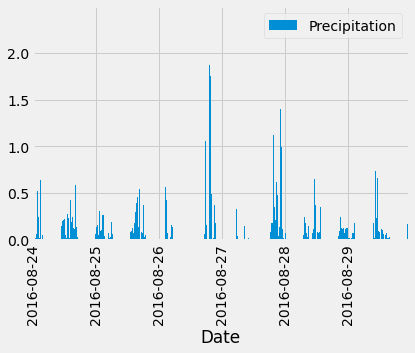

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
p_df = pd.DataFrame(p_score, columns=['Date', 'Precipitation'])
p_df.set_index('Date', inplace=True)
p_df.sort_values("Date")
p_df.plot.bar()
plt.locator_params(axis='x', nbins=6)
# plt.xlim("2016-08-24", "2016-11-24", "2017-02-24", "2017-05-24", "2017-08-24")
# plt.tight_layout()
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset

# engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# conn = engine.connect()
# data = pd.read_sql("SELECT * FROM Station", conn)
# data.count()

session.query(func.count(Station.station)).all()

[(9)]

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

for row in session.query(Station, Station.station).all():
    print(row)
    
active = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(Measurement.station.desc()).all()
                 
print(active)  
                 
USC00519397 = session.query(Measurement.station).filter(Measurement.station == 'USC00519397').count()
print(f"There are {USC00519397} rows for station USC00519397")

USC00513117 = session.query(Measurement.station).filter(Measurement.station == 'USC00513117').count()
print(f"There are {USC00513117} rows for station USC00513117")

USC00514830 = session.query(Measurement.station).filter(Measurement.station == 'USC00514830').count()
print(f"There are {USC00514830} rows for station USC00514830")

USC00517948 = session.query(Measurement.station).filter(Measurement.station == 'USC00517948').count()
print(f"There are {USC00517948} rows for station USC00517948")

USC00518838 = session.query(Measurement.station).filter(Measurement.station == 'USC00518838').count()
print(f"There are {USC00518838} rows for station USC00518838")

USC00519523 = session.query(Measurement.station).filter(Measurement.station == 'USC00519523').count()
print(f"There are {USC00519523} rows for station USC00519523")

USC00519281 = session.query(Measurement.station).filter(Measurement.station == 'USC00519281').count()
print(f"There are {USC00519281} rows for station USC00519281")

USC00511918 = session.query(Measurement.station).filter(Measurement.station == 'USC00511918').count()
print(f"There are {USC00511918} rows for station USC00511918")

USC00516128 = session.query(Measurement.station).filter(Measurement.station == 'USC00516128').count()
print(f"There are {USC00516128} rows for station USC00516128")



(<sqlalchemy.ext.automap.station object at 0x000001E752483A90>, 'USC00519397')
(<sqlalchemy.ext.automap.station object at 0x000001E7542D8940>, 'USC00513117')
(<sqlalchemy.ext.automap.station object at 0x000001E7542D8B20>, 'USC00514830')
(<sqlalchemy.ext.automap.station object at 0x000001E7542D8220>, 'USC00517948')
(<sqlalchemy.ext.automap.station object at 0x000001E7542D8B80>, 'USC00518838')
(<sqlalchemy.ext.automap.station object at 0x000001E7542D80A0>, 'USC00519523')
(<sqlalchemy.ext.automap.station object at 0x000001E7542D8F40>, 'USC00519281')
(<sqlalchemy.ext.automap.station object at 0x000001E7542D8340>, 'USC00511918')
(<sqlalchemy.ext.automap.station object at 0x000001E7542B5700>, 'USC00516128')
[('USC00519523', 2669), ('USC00519397', 2724), ('USC00519281', 2772), ('USC00518838', 511), ('USC00517948', 1372), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00513117', 2709), ('USC00511918', 1979)]
There are 2724 rows for station USC00519397
There are 2709 rows for station USC005

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.

session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()
       

[(54.0, 71.66378066378067, 85.0)]

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.
one_year = dt.datetime.strptime(rec_date, '%Y-%m-%d') - dt.timedelta(days=365)
# one_year


tobs_score = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= one_year).all()
tobs_score

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

<function matplotlib.pyplot.show(*args, **kw)>

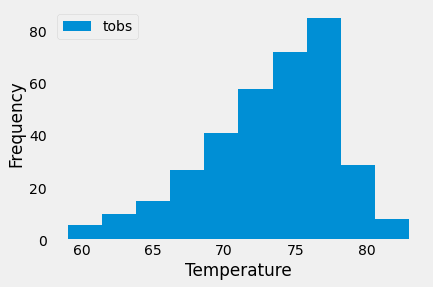

In [56]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_df.plot.hist(by='station')
plt.grid()
plt.xlabel('Temperature')
plt.show

# Close session

In [57]:
# Close Session
session.close()